## Linear Regression

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [10]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
dataset.shape

(30, 2)

#### Reshaping the Data and then splitting it into training and testing for linear regression modeling

In [12]:
X = dataset.drop(['Salary'], axis=True)
Y = dataset['Salary']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state = 42)

In [13]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((24, 1), (6, 1), (24,), (6,))

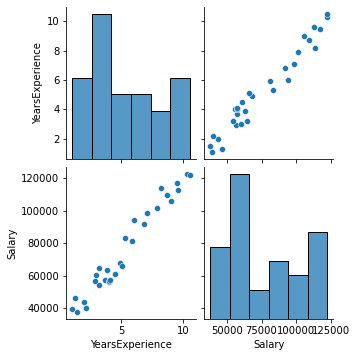

In [14]:
##visualizing the data
import seaborn as sns
sns.pairplot(dataset)

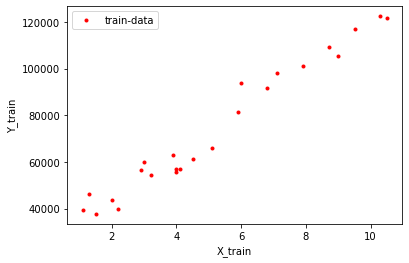

In [15]:
# visualize the train data
plt.plot(X_train,Y_train,'r.',label='train-data')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.legend()
plt.show()

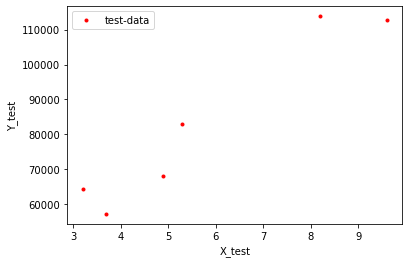

In [16]:
# visualize the test data
plt.plot(X_test,Y_test,'r.',label='test-data')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()

## Importing the Linear Regression library to train this simple regression model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

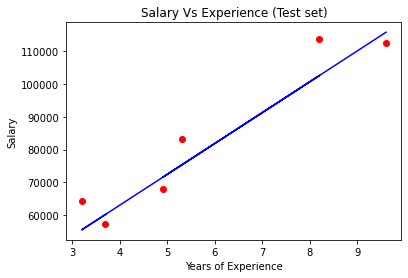

In [18]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary Vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

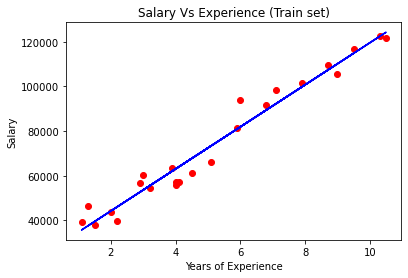

In [19]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary Vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [20]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(regressor,f)

In [21]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [22]:
r_squared = mp.score(X, Y)
print(f"R^2 score = {np.round(r_squared * 100, 2)}%")

R^2 score = 95.64%


A high R shows that our model explains a majority of the variability of the response data round its mean.
